In [1]:
#load the libries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
## make data set using regression
from sklearn.datasets import make_regression

In [3]:
X,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=0.3)

<AxesSubplot:xlabel='0', ylabel='1'>

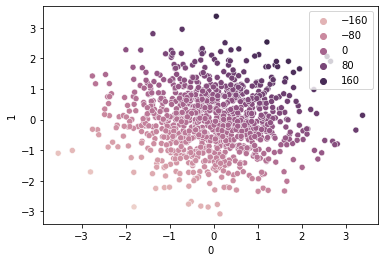

In [5]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [6]:
## train test split the value
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
## create the SVM regression
from sklearn.svm import SVR

In [11]:
svr=SVR(kernel='linear')

In [13]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [14]:
y_pred=svr.predict(X_test)

In [15]:
from sklearn.metrics import r2_score

In [16]:
print(r2_score(y_test,y_pred))

0.9999795918124157


In [27]:
parameter={
    'kernel' : ['linear'],
    'C':[0.1,10,100,1000],
    'gamma' :[1,0.1,0.01,0.001,0.0001],
    'epsilon':[0.1,0.2,0.3]
    
}
parameter

{'kernel': ['linear'],
 'C': [0.1, 10, 100, 1000],
 'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
 'epsilon': [0.1, 0.2, 0.3]}

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
gv=GridSearchCV(SVR(),param_grid=parameter,cv=5,verbose=3,refit=True,scoring='neg_mean_squared_error')

In [30]:
gv.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-693.293 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-420.839 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-594.725 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-482.554 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-531.695 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-693.293 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-420.839 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-594.725 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-482.554 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-531.695 total time=   0.0s
[CV 1/5]

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 10, 100, 1000], 'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             scoring='neg_mean_squared_error', verbose=3)

In [32]:
gv.best_params_

{'C': 1000, 'epsilon': 0.3, 'gamma': 1, 'kernel': 'linear'}

In [33]:
y_predcv=gv.predict(X_test)

In [34]:
print(r2_score(y_test,y_predcv))

0.9999794276461373
